# Least Squares Algorithms: Examples

In [16]:
import sys
sys.path.append('..')

from src.industryts.generation.synthetic import ar_process
from src.industryts.models.optimization import LeastSquaresOptimizer

import numpy as np
from rich import print, pretty, traceback
import matplotlib.pyplot as plt

rng = np.random.default_rng(1506)

We start by generating random data that will be used in model training.

In [22]:
# Some tests

# Number of samples
n = 100
# Dimensionality of the regressors
p = 3

# Create a matrix of regressors, where each column is an AR(1) process
regressors = np.array(
    [ar_process(coefs=0.98, samples=n, noise=0.05) for _ in range(p)]).T

# Create a vector of targets with known coefficients.
coefs = rng.normal(size=(p, 1))
targets = regressors @ coefs

# Add some noise to the targets
targets += rng.normal(scale=0.2, size=(n, 1))


We then train the coefficients and print the results, as well as the true coefficients.

In [23]:
# OLS
ols = LeastSquaresOptimizer(method="OLS")
ols.fit(regressors, targets)

# RLS
rls = LeastSquaresOptimizer(method="RLS")
history = rls.fit(regressors, targets, return_history=True)

print("True coefficients:")
print([f"{c:.2f}" for c in coefs.flatten()])
print("OLS coefficients:")
print([f"{c:.2f}" for c in ols.coefs.flatten()])
print("RLS coefficients:")
print([f"{c:.2f}" for c in rls.coefs[-1].flatten()])

True coefficients:

['0.10', '-1.63', '-0.03']

OLS coefficients:

['0.09', '-1.62', '-0.02']

RLS coefficients:

['0.09', '-1.63', '-0.02']

We can also see how the RLS coefficients converged over time.

Text(0, 0.5, 'Coefficient value')

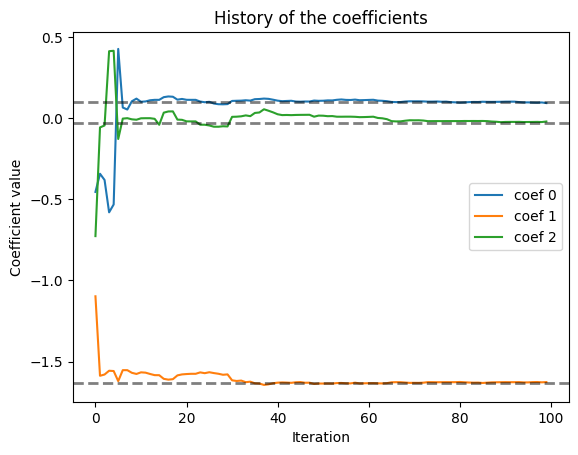

In [24]:
# Plot the history of the coefficients
fig, ax = plt.subplots()

for i in range(p):
    ax.plot(history[:, i], label=f"coef {i}")

# Add straight lines for the true coefficients
for i in range(p):
    ax.axhline(coefs[i], linestyle="--", color="black", xmin=0, xmax=1,
               linewidth=2, alpha=0.5)

ax.legend()
ax.set_title("History of the coefficients")
ax.set_xlabel("Iteration")
ax.set_ylabel("Coefficient value")
